## Task 1: Understanding Unit Commitment and optimization model
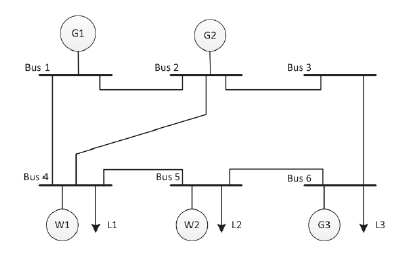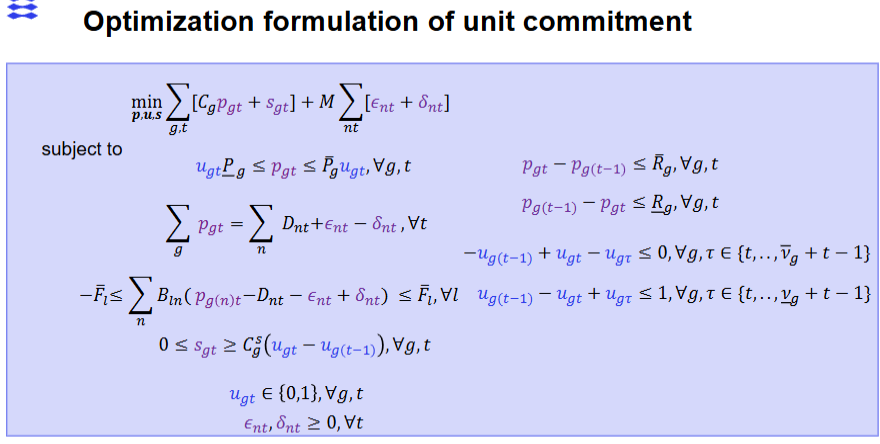

In [ ]:
import gurobipy as gp
from gurobipy import GRB

#### Create model ####
model = gp.Model()

### Parameters ###
g = len(Pmax)
t = len(demand)
n = len(nodes) # number of nodes
C_g = [0, 10, 20, 30, 40] # Marginal cost for each generator
C_gs = [0, 10, 20, 30, 40] # Start up cost for each generator


#### Decision variables ####


# Production/bid in DA market
p_gt = model.addVars(g,t, lb = P_min, ub = P_max, vtype=GRB.CONTINUOUS, name="p_gt") # Power production in each generator in each time period
u_gt = model.addVars(g,t, lb = 0, ub = 1, vtype=GRB.BINARY, name="u_gt") # Binary variable for each generator in each time period
s_gt = model.addVars(g,t, lb = 0, vtype=GRB.CONTINUOUS, name="s_gt") # Start up cost for each generator in each time period

# Slack variables
delta = model.addVars(n,t, lb = 0, vtype=GRB.CONTINUOUS, name="delta") # Slack variable for each time period for each node
epsilon = model.addVars(n,t, lb = 0, vtype=GRB.CONTINUOUS, name="eta") # Slack variable for each time period for each node


### Constraints ###

# Power balance
model.addConstrs((gp.quicksum(p_gt[g,t] for g in range(len(Pmax))) == demand[t] for t in range(len(demand)), "Power balance")

## Task 2: Data preperation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
B = pd.read_csv('data/B (power transfer factor of each bus to each line).csv', sep=';')
P_max = pd.read_csv('data\Maximum production of generating units.csv')
P_min = pd.read_csv('data\Minimum production of generating units.csv')
min_downtime = pd.read_csv('data\Minimum down time of generating units.csv')
min_uptime = pd.read_csv('data\Minimum up time of generating units.csv')
c = pd.read_csv('data\Production cost of generating units.csv')
c_startup = pd.read_csv('data\Start-up cost of generating units.csv')
ramp = pd.read_csv('data\Ramping rate of generating units.csv')
F = pd.read_csv('data\Transmission capacity of lines.csv')

# Load wind data
W_cap = pd.read_csv('data/Capacity of wind farms.csv')
W1 = pd.read_csv('data\W1.csv', skiprows=3) 
W2 = pd.read_csv('data\W2.csv', skiprows=3)

# Scale wind data
W1 = np.array(W1.iloc[:,2]) * W_cap.values[0]
W2 = np.array(W2.iloc[:,2]) * W_cap.values[1]
W = np.vstack((W1, W2)).T

# Remove first row to fit with demand data
W = W[1:]

# Load demand data
D = pd.read_csv('data\ConsumptionPerGridarea.csv', sep=';', decimal=',')
D = D.loc[D['GridCompany'].isin([131, 344, 16])]
D["HourDK"] = pd.to_datetime(D["HourDK"])
D = D.loc[D["HourDK"].dt.year == 2021]
D = D.pivot_table(index = "HourDK", columns = "GridCompany", values = "FlexSettledConsumption")

# Read and scale demand data
D_cap = pd.read_csv('data\Loads.csv')
D = (D/np.max(D, axis=0)) * D_cap.values.T
D = D.values


# Split into training, validation and test sets
train_test_fraction = 0.8
train_val_fraction = 0.8
n = len(W1)
train_test_split = int(n * train_test_fraction)
train_val_split = int(train_test_split * train_val_fraction)

D_train = D[:train_test_split]
D_train_train = D[:train_val_split]
D_val = D_train[train_val_split:]
D_test = D[train_test_split:]

W_train = W[:train_test_split]
W_train_train = W[:train_val_split]
W_val = W_train[train_val_split:]
W_test = W[train_test_split:]

# Run simluations


# Save results



## Task 3: Train classifiers

8759

In [ ]:
# Train classifier


array([[25.07423784, 55.12019576, 56.95618532],
       [23.8187883 , 52.50223829, 54.88102191],
       [21.72655341, 49.41647916, 51.9030076 ],
       ...,
       [28.71189202, 60.19854386, 60.01307187],
       [27.39236677, 56.44214136, 56.30035845],
       [25.54774649, 53.83798372, 53.47418693]])

## Task 4: Evaluate models